In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Назначить именованные столбцы согласно предоставленной спецификации.
columns = [
    "checking_status",
    "duration",
    "credit_history",
    "purpose",
    "credit_amount",
    "savings",
    "employment",
    "installment_rate",
    "personal_status",
    "other",
    "residence_since",
    "property",
    "age",
    "other_installments_plans",
    "housing",
    "existing_credits",
    "job",
    "number_of_liable",
    "telephone",
    "foreing_worker",
    "class"
]

#Скачать и загрузить набор данных "German Credit Data".
df = pd.read_csv("./statlog+german+credit+data/german.data", sep=' ', names=columns)

#Обработать возможные пропущенные значения.
print(df.isnull().sum())


df

checking_status             0
duration                    0
credit_history              0
purpose                     0
credit_amount               0
savings                     0
employment                  0
installment_rate            0
personal_status             0
other                       0
residence_since             0
property                    0
age                         0
other_installments_plans    0
housing                     0
existing_credits            0
job                         0
number_of_liable            0
telephone                   0
foreing_worker              0
class                       0
dtype: int64


,checking_status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other,...,property,age,other_installments_plans,housing,existing_credits,job,number_of_liable,telephone,foreing_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [19]:
#Анализ данных
df.info()

#Выполнить описание числовых признаков (статистики, распределения).
display(df.describe())

#Проанализировать категориальные признаки (частоты и распределения).
display(df.describe(include=['object']))

#Провести кодирование категориальных признаков в числовой формат для дальнейшего анализа.
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
le = LabelEncoder()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = le.fit_transform(df_encoded[column])
display(df_encoded)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   checking_status           1000 non-null   object
 1   duration                  1000 non-null   int64 
 2   credit_history            1000 non-null   object
 3   purpose                   1000 non-null   object
 4   credit_amount             1000 non-null   int64 
 5   savings                   1000 non-null   object
 6   employment                1000 non-null   object
 7   installment_rate          1000 non-null   int64 
 8   personal_status           1000 non-null   object
 9   other                     1000 non-null   object
 10  residence_since           1000 non-null   int64 
 11  property                  1000 non-null   object
 12  age                       1000 non-null   int64 
 13  other_installments_plans  1000 non-null   object
 14  housing                  

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,number_of_liable,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


,checking_status,credit_history,purpose,savings,employment,personal_status,other,property,other_installments_plans,housing,job,telephone,foreing_worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


,checking_status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other,...,property,age,other_installments_plans,housing,existing_credits,job,number_of_liable,telephone,foreing_worker,class
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,3,1736,0,3,3,1,0,...,0,31,2,1,1,1,1,0,0,1
996,0,30,2,1,3857,0,2,4,0,0,...,1,40,2,1,1,3,1,1,0,1
997,3,12,2,4,804,0,4,4,2,0,...,2,38,2,1,1,2,1,0,0,1
998,0,45,2,4,1845,0,2,4,2,0,...,3,23,2,2,1,2,1,1,0,2


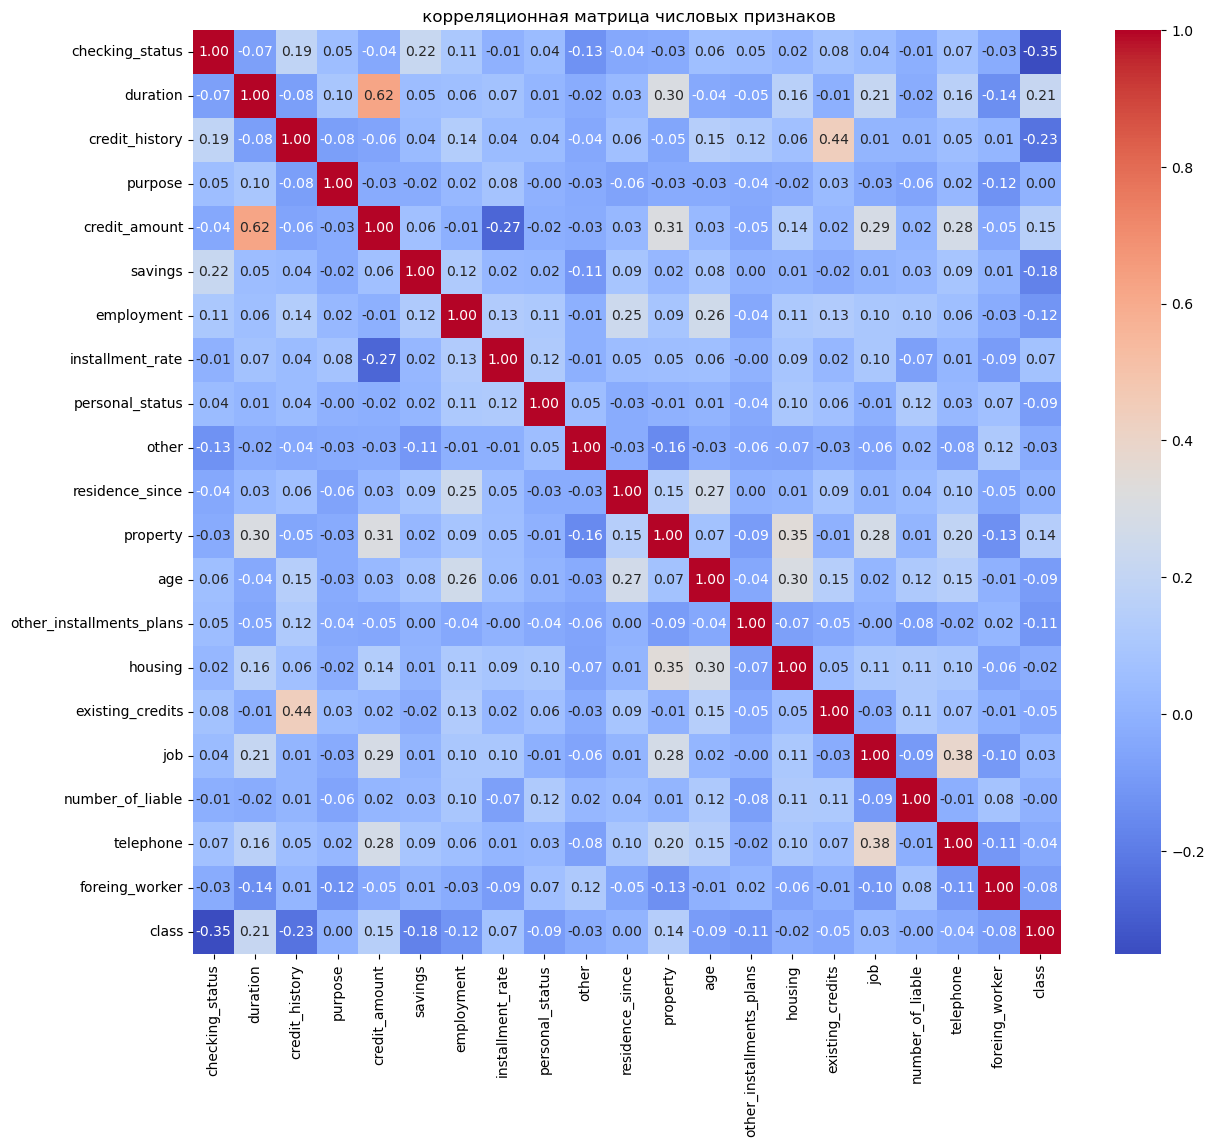

,credit_amount,duration
purpose,,
A410,8209.3,32.3
A41,5370.2,26.1
A49,4158.0,26.9
A46,3180.4,21.1
A42,3067.0,19.3
A40,3063.0,18.5
A45,2728.1,19.1
A43,2487.7,20.0
A44,1498.0,16.8


,credit_amount,age,duration
class,,,
1,2985.5,36.2,19.2
2,3938.1,34.0,24.9


credit_history
A34    1.856655
A30    1.725000
A33    1.670455
A31    1.163265
A32    1.113208
Name: existing_credits, dtype: float64

installment_rate
1    4321.198529
2    4185.017316
3    3305.535032
4    2516.527311
Name: credit_amount, dtype: float64

job
A174    5435.493243
A173    3070.965079
A171    2745.136364
A172    2358.520000
Name: credit_amount, dtype: float64

property
A124    4917.298701
A123    3574.120482
A122    3104.142241
A121    2153.280142
Name: credit_amount, dtype: float64

property
A124    26.915584
A123    22.945783
A122    19.659483
A121    16.237589
Name: duration, dtype: float64

In [20]:
#Обработка и исследование взаимосвязей

#Построить корреляционную матрицу числовых признаков.
plt.figure(figsize=(14, 12))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title(' корреляционная матрица числовых признаков')
plt.show()


#Провести группировки и агрегацию по ключевым признакам (например, по статусу кредитования, по целям кредита).
group_purpose = df.groupby('purpose')[['credit_amount', 'duration']].mean().round(1)
display(group_purpose.sort_values(by='credit_amount', ascending=False))

group_class = df.groupby('class')[['credit_amount', 'age', 'duration']].mean().round(1)
display(group_class)

history_group = df.groupby('credit_history')['existing_credits'].mean()
display(history_group.sort_values(ascending=False))

rate_group = df.groupby('installment_rate')['credit_amount'].mean()
display(rate_group)

job_group = df.groupby('job')['credit_amount'].mean().sort_values(ascending=False)
display(job_group)

prop_group = df.groupby('property')['credit_amount'].mean().sort_values(ascending=False)
display(prop_group)

prop_dur_group = df.groupby('property')['duration'].mean().sort_values(ascending=False)
display(prop_dur_group)

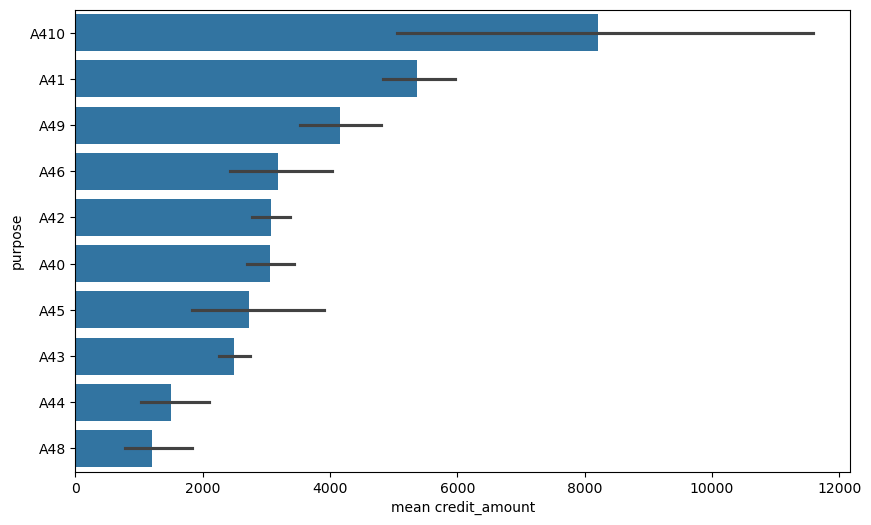

In [21]:
plt.figure(figsize=(10, 6))
order_purpose = df.groupby('purpose')['credit_amount'].mean().sort_values(ascending=False).index
sns.barplot(x='credit_amount', y='purpose', data=df, order=order_purpose)
plt.xlabel('mean credit_amount')
plt.ylabel('purpose')
plt.show()

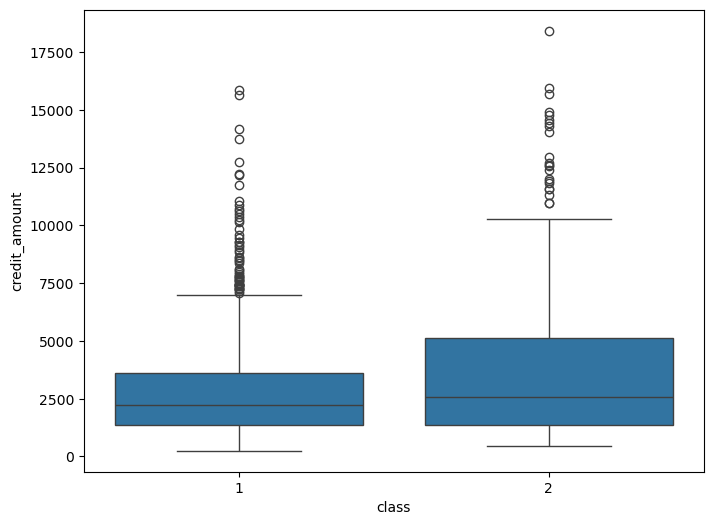

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='class', y='credit_amount')
plt.xlabel('class')
plt.ylabel('credit_amount')
plt.show()

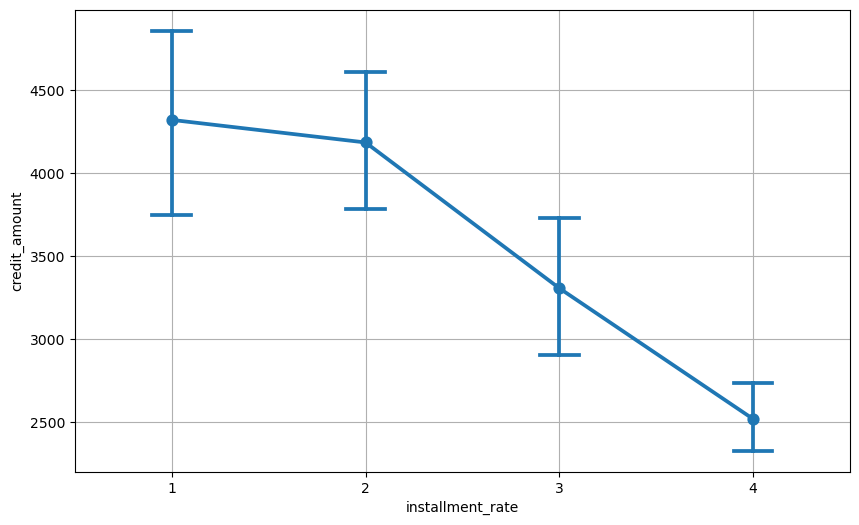

In [23]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='installment_rate', y='credit_amount', capsize=.2)
plt.xlabel('installment_rate')
plt.ylabel('credit_amount')
plt.grid(True)
plt.show()

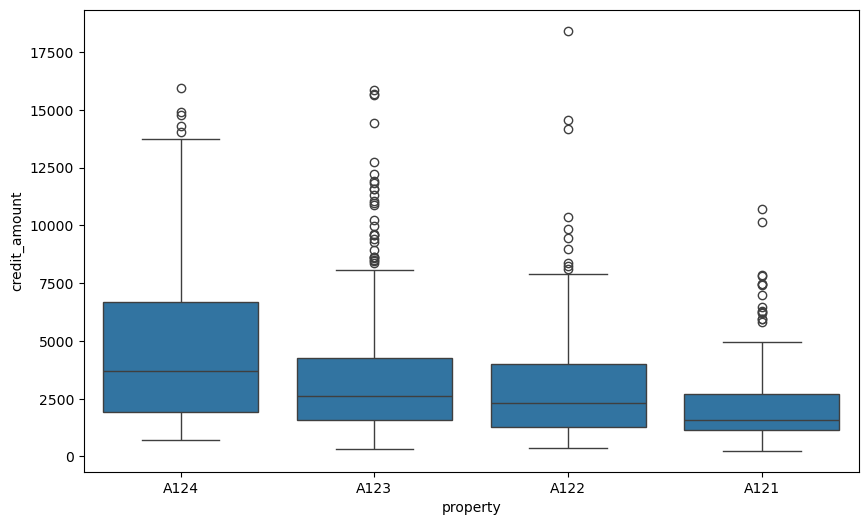

In [24]:
plt.figure(figsize=(10, 6))
order_prop = df.groupby('property')['credit_amount'].mean().sort_values(ascending=False).index
sns.boxplot(data=df, x='property', y='credit_amount', order=order_prop)
plt.show()

In [25]:
import sqlite3
conn = sqlite3.connect('german_data.db')
cursor = conn.cursor()
df.to_sql('credits', conn, if_exists='replace', index=False)

1000

In [26]:

q1 = """
SELECT purpose, credit_amount, duration, age, job
FROM credits
ORDER BY credit_amount DESC
LIMIT 5
"""
display(pd.read_sql(q1, conn))

q2 = """
SELECT purpose, 
       COUNT(*) as count, 
       ROUND(AVG(credit_amount), 0) as avg_amount
FROM credits
GROUP BY purpose
ORDER BY avg_amount DESC
"""
display(pd.read_sql(q2, conn))

q3 = """
SELECT age, credit_amount, duration
FROM credits
WHERE class = 2 AND property = 'A124'
ORDER BY credit_amount DESC
LIMIT 5
"""
display(pd.read_sql(q3, conn))

,purpose,credit_amount,duration,age,job
0,A410,18424,48,32,A174
1,A49,15945,54,58,A173
2,A410,15857,36,43,A174
3,A49,15672,48,23,A173
4,A43,15653,60,21,A173


,purpose,count,avg_amount
0,A410,12,8209.0
1,A41,103,5370.0
2,A49,97,4158.0
3,A46,50,3180.0
4,A42,181,3067.0
5,A40,234,3063.0
6,A45,22,2728.0
7,A43,280,2488.0
8,A44,12,1498.0
9,A48,9,1206.0


,age,credit_amount,duration
0,58,15945,54
1,68,14896,6
2,60,14782,60
3,57,14318,36
4,27,14027,60


In [27]:
conn.close()
